# 1. Introduction

Home Credit strives to broaden financial inclusion for the unbanked population by providing a positive and safe borrowing experience. In order to make sure this underserved population has a positive loan experience, Home Credit makes use of a variety of alternative data--including telco and transactional information--to predict their clients' repayment abilities.

While Home Credit is currently using various statistical and machine learning methods to make these predictions, they're challenging Kagglers to help them unlock the full potential of their data. Doing so will ensure that clients capable of repayment are not rejected and that loans are given with a principal, maturity, and repayment calendar that will empower their clients to be successful.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
Path= "drive/My Drive/Data Science/Python/Projects/Project Data"

 # 2. Retrieving the Data

In [3]:
import pandas as pd 



In [4]:
import numpy as np 
import matplotlib
import matplotlib.pyplot as plt

In [5]:
#code


In [6]:
test= pd.read_csv(Path+"/application_test.csv")
train= pd.read_csv(Path+"/application_train.csv")
bb= pd.read_csv(Path+"/bureau_balance.csv")
bu= pd.read_csv(Path+"/bureau.csv")
ccb= pd.read_csv(Path+"/credit_card_balance.csv")
ip= pd.read_csv(Path+"/installments_payments.csv")
ps= pd.read_csv(Path+"/POS_CASH_balance.csv")

In [7]:
pa= pd.read_csv(Path+"/previous_application.csv")

ss= pd.read_csv(Path+"/sample_submission.csv")

In [8]:
#hc= pd.read_csv(Path+"/HomeCredit_columns_description.csv") // MetaData that's why we can't read.

In [9]:
print("Size of Application_train data ", train.shape)
print("Size of POS_CASH_balance data ", ps.shape)
print("Size of bureau_balance data ", bb.shape)
print("Size of previous_application data ", pa.shape)
print("Size of installments_payments data ", ip.shape)
print("Size of credit_card_balance data ", ccb.shape)
print("Size of bureau data ", bu.shape)

Size of Application_train data  (307511, 122)
Size of POS_CASH_balance data  (10001358, 8)
Size of bureau_balance data  (27299925, 3)
Size of previous_application data  (1670214, 37)
Size of installments_payments data  (13605401, 8)
Size of credit_card_balance data  (3840312, 23)
Size of bureau data  (1716428, 17)


# 3. Check  Data

Application_train data

In [11]:
#analyse datset
train.head(10)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0
6,100009,0,Cash loans,F,Y,Y,1,171000.0,1560726.0,41301.0,...,0,0,0,0,0.0,0.0,0.0,1.0,1.0,2.0
7,100010,0,Cash loans,M,Y,Y,0,360000.0,1530000.0,42075.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
8,100011,0,Cash loans,F,N,Y,0,112500.0,1019610.0,33826.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
9,100012,0,Revolving loans,M,N,Y,0,135000.0,405000.0,20250.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
trans =  train.describe().T
pd.set_option('display.max_rows', trans.shape[0]+1)
trans

,count,mean,std,min,25%,50%,75%,max
SK_ID_CURR,307511.0,278180.518577,102790.175348,1.000020e+05,189145.500000,278202.000000,367142.500000,4.562550e+05
TARGET,307511.0,0.080729,0.272419,0.000000e+00,0.000000,0.000000,0.000000,1.000000e+00
CNT_CHILDREN,307511.0,0.417052,0.722121,0.000000e+00,0.000000,0.000000,1.000000,1.900000e+01
AMT_INCOME_TOTAL,307511.0,168797.919297,237123.146279,2.565000e+04,112500.000000,147150.000000,202500.000000,1.170000e+08
AMT_CREDIT,307511.0,599025.999706,402490.776996,4.500000e+04,270000.000000,513531.000000,808650.000000,4.050000e+06
AMT_ANNUITY,307499.0,27108.573909,14493.737315,1.615500e+03,16524.000000,24903.000000,34596.000000,2.580255e+05
AMT_GOODS_PRICE,307233.0,538396.207429,369446.460540,4.050000e+04,238500.000000,450000.000000,679500.000000,4.050000e+06
REGION_POPULATION_RELATIVE,307511.0,0.020868,0.013831,2.900000e-04,0.010006,0.018850,0.028663,7.250800e-02
DAYS_BIRTH,307511.0,-16036.995067,4363.988632,-2.522900e+04,-19682.000000,-15750.000000,-12413.000000,-7.489000e+03
DAYS_EMPLOYED,307511.0,63815.045904,141275.766519,-1.791200e+04,-2760.000000,-1213.000000,-289.000000,3.652430e+05


In [13]:
train.columns.values

array(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE',
       'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE',
       'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_1',
       'EXT_SOURCE_2', 'EXT_SOURCE_3',

In [14]:
ps.head(20)

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,45.0,Active,0,0
1,1715348,367990,-33,36.0,35.0,Active,0,0
2,1784872,397406,-32,12.0,9.0,Active,0,0
3,1903291,269225,-35,48.0,42.0,Active,0,0
4,2341044,334279,-35,36.0,35.0,Active,0,0
5,2207092,342166,-32,12.0,12.0,Active,0,0
6,1110516,204376,-38,48.0,43.0,Active,0,0
7,1387235,153211,-35,36.0,36.0,Active,0,0
8,1220500,112740,-31,12.0,12.0,Active,0,0
9,2371489,274851,-32,24.0,16.0,Active,0,0


**POS_CASH_balance data**

In [15]:
#analyse dataset
trans_ps =  ps.describe(include = 'all').T
pd.set_option('display.max_rows', trans_ps.shape[0]+1)
trans_ps

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
SK_ID_PREV,10001358.0,NaN,NaN,NaN,1903216.598957,535846.530722,1000001.0,1434405.0,1896565.0,2368963.0,2843499.0
SK_ID_CURR,10001358.0,NaN,NaN,NaN,278403.863306,102763.74509,100001.0,189550.0,278654.0,367429.0,456255.0
MONTHS_BALANCE,10001358.0,NaN,NaN,NaN,-35.012588,26.06657,-96.0,-54.0,-28.0,-13.0,-1.0
CNT_INSTALMENT,9975287.0,NaN,NaN,NaN,17.08965,11.995056,1.0,10.0,12.0,24.0,92.0
CNT_INSTALMENT_FUTURE,9975271.0,NaN,NaN,NaN,10.48384,11.109058,0.0,3.0,7.0,14.0,85.0
NAME_CONTRACT_STATUS,10001358,9,Active,9151119,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SK_DPD,10001358.0,NaN,NaN,NaN,11.606928,132.714043,0.0,0.0,0.0,0.0,4231.0
SK_DPD_DEF,10001358.0,NaN,NaN,NaN,0.654468,32.762491,0.0,0.0,0.0,0.0,3595.0


**bureau_balance data**

In [16]:
#analyse dataset
bb.head(20)

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
...,...,...,...
16,5715448,-16,0
17,5715448,-17,0
18,5715448,-18,0
19,5715448,-19,0


In [17]:
trans_bb =  bb.describe(include = 'all').T
pd.set_option('display.max_rows', trans_bb.shape[0]+1)
trans_bb

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
SK_ID_BUREAU,27299925.0,NaN,NaN,NaN,6036297.332974,492348.856904,5001709.0,5730933.0,6070821.0,6431951.0,6842888.0
MONTHS_BALANCE,27299925.0,NaN,NaN,NaN,-30.741687,23.864509,-96.0,-46.0,-25.0,-11.0,0.0
STATUS,27299925,8,C,13646993,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**previous_application data**

In [18]:
#analyse dataset
pa.head(20)

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18,2393109,396305,Cash loans,10181.700,180000.0,180000.0,NaN,180000.0,THURSDAY,14,...,XNA,24.0,low_normal,Cash X-Sell: low,NaN,NaN,NaN,NaN,NaN,NaN
19,1173070,199178,Cash loans,4666.500,45000.0,49455.0,NaN,45000.0,SATURDAY,16,...,XNA,18.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
trans_pa =  pa.describe(include = 'all').T
pd.set_option('display.max_rows', trans_pa.shape[0]+1)
trans_pa

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
SK_ID_PREV,1670214.0,NaN,NaN,NaN,1923089.135331,532597.958696,1000001.0,1461857.25,1923110.5,2384279.75,2845382.0
SK_ID_CURR,1670214.0,NaN,NaN,NaN,278357.174099,102814.823849,100001.0,189329.0,278714.5,367514.0,456255.0
NAME_CONTRACT_TYPE,1670214,4,Cash loans,747553,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AMT_ANNUITY,1297979.0,NaN,NaN,NaN,15955.120659,14782.137335,0.0,6321.78,11250.0,20658.42,418058.145
AMT_APPLICATION,1670214.0,NaN,NaN,NaN,175233.86036,292779.762387,0.0,18720.0,71046.0,180360.0,6905160.0
AMT_CREDIT,1670213.0,NaN,NaN,NaN,196114.021218,318574.616546,0.0,24160.5,80541.0,216418.5,6905160.0
AMT_DOWN_PAYMENT,774370.0,NaN,NaN,NaN,6697.402139,20921.49541,-0.9,0.0,1638.0,7740.0,3060045.0
AMT_GOODS_PRICE,1284699.0,NaN,NaN,NaN,227847.279283,315396.557937,0.0,50841.0,112320.0,234000.0,6905160.0
WEEKDAY_APPR_PROCESS_START,1670214,7,TUESDAY,255118,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HOUR_APPR_PROCESS_START,1670214.0,NaN,NaN,NaN,12.484182,3.334028,0.0,10.0,12.0,15.0,23.0


**installments_payments data**

In [20]:
#analyse dataset
ip.head(10)

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130,24350.130
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040,2160.585
5,1137312,164489,1.0,12,-1384.0,-1417.0,5970.375,5970.375
6,2234264,184693,4.0,11,-349.0,-352.0,29432.295,29432.295
7,1818599,111420,2.0,4,-968.0,-994.0,17862.165,17862.165
8,2723183,112102,0.0,14,-197.0,-197.0,70.740,70.740
9,1413990,109741,1.0,4,-570.0,-609.0,14308.470,14308.470


In [21]:
trans_ip =  ip.describe(include = 'all').T
pd.set_option('display.max_rows', trans_ip.shape[0]+1)
trans_ip

,count,mean,std,min,25%,50%,75%,max
SK_ID_PREV,13605401.0,1.903365e+06,536202.905546,1000001.0,1434191.000,1896520.000,2369094.000,2843499.000
SK_ID_CURR,13605401.0,2.784449e+05,102718.310411,100001.0,189639.000,278685.000,367530.000,456255.000
NUM_INSTALMENT_VERSION,13605401.0,8.566373e-01,1.035216,0.0,0.000,1.000,1.000,178.000
NUM_INSTALMENT_NUMBER,13605401.0,1.887090e+01,26.664067,1.0,4.000,8.000,19.000,277.000
DAYS_INSTALMENT,13605401.0,-1.042270e+03,800.946284,-2922.0,-1654.000,-818.000,-361.000,-1.000
DAYS_ENTRY_PAYMENT,13602496.0,-1.051114e+03,800.585883,-4921.0,-1662.000,-827.000,-370.000,-1.000
AMT_INSTALMENT,13605401.0,1.705091e+04,50570.254429,0.0,4226.085,8884.080,16710.210,3771487.845
AMT_PAYMENT,13602496.0,1.723822e+04,54735.783981,0.0,3398.265,8125.515,16108.425,3771487.845


**credit_card_balance data**

In [22]:
#analyse dataset
ccb.head(10)

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.0,877.500,0.0,877.500,1700.325,...,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.000,0.0,0.000,2250.000,...,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.000,0.0,0.000,2250.000,...,31460.085,31460.085,0.0,0,0.0,0.0,30.0,Active,0,0
3,1389973,337855,-4,236572.110,225000,2250.0,2250.000,0.0,0.000,11795.760,...,233048.970,233048.970,1.0,1,0.0,0.0,10.0,Active,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6,1079071,171320,-6,353451.645,585000,67500.0,67500.000,0.0,0.000,14684.175,...,351881.145,351881.145,1.0,1,0.0,0.0,6.0,Active,0,0
7,2095912,118650,-7,47962.125,45000,45000.0,45000.000,0.0,0.000,0.000,...,47962.125,47962.125,1.0,1,0.0,0.0,51.0,Active,0,0
8,2181852,367360,-4,291543.075,292500,90000.0,289339.425,0.0,199339.425,130.500,...,286831.575,286831.575,3.0,8,0.0,5.0,3.0,Active,0,0
9,1235299,203885,-5,201261.195,225000,76500.0,111026.700,0.0,34526.700,6338.340,...,197224.695,197224.695,3.0,9,0.0,6.0,38.0,Active,0,0


In [23]:
trans_ccb =  ccb.describe(include = 'all').T
pd.set_option('display.max_rows', trans_ccb.shape[0]+1)
trans_ccb

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
SK_ID_PREV,3840312.0,NaN,NaN,NaN,1904503.5899,536469.470563,1000018.0,1434385.0,1897122.0,2369327.75,2843496.0
SK_ID_CURR,3840312.0,NaN,NaN,NaN,278324.207289,102704.475133,100006.0,189517.0,278396.0,367580.0,456250.0
MONTHS_BALANCE,3840312.0,NaN,NaN,NaN,-34.521921,26.667751,-96.0,-55.0,-28.0,-11.0,-1.0
AMT_BALANCE,3840312.0,NaN,NaN,NaN,58300.155262,106307.031025,-420250.185,0.0,0.0,89046.68625,1505902.185
AMT_CREDIT_LIMIT_ACTUAL,3840312.0,NaN,NaN,NaN,153807.9574,165145.699523,0.0,45000.0,112500.0,180000.0,1350000.0
AMT_DRAWINGS_ATM_CURRENT,3090496.0,NaN,NaN,NaN,5961.324822,28225.688579,-6827.31,0.0,0.0,0.0,2115000.0
AMT_DRAWINGS_CURRENT,3840312.0,NaN,NaN,NaN,7433.388179,33846.077334,-6211.62,0.0,0.0,0.0,2287098.315
AMT_DRAWINGS_OTHER_CURRENT,3090496.0,NaN,NaN,NaN,288.169582,8201.989345,0.0,0.0,0.0,0.0,1529847.0
AMT_DRAWINGS_POS_CURRENT,3090496.0,NaN,NaN,NaN,2968.804848,20796.887047,0.0,0.0,0.0,0.0,2239274.16
AMT_INST_MIN_REGULARITY,3535076.0,NaN,NaN,NaN,3540.204129,5600.154122,0.0,0.0,0.0,6633.91125,202882.005


**bureau data**

In [24]:
#analyse dataset
bu.head(10)

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.00,0.00,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.00,171342.00,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.50,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.00,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.00,NaN,NaN,0.0,Consumer credit,-21,NaN
5,215354,5714467,Active,currency 1,-273,0,27460.0,NaN,0.0,0,180000.00,71017.38,108982.62,0.0,Credit card,-31,NaN
6,215354,5714468,Active,currency 1,-43,0,79.0,NaN,0.0,0,42103.80,42103.80,0.00,0.0,Consumer credit,-22,NaN
7,162297,5714469,Closed,currency 1,-1896,0,-1684.0,-1710.0,14985.0,0,76878.45,0.00,0.00,0.0,Consumer credit,-1710,NaN
8,162297,5714470,Closed,currency 1,-1146,0,-811.0,-840.0,0.0,0,103007.70,0.00,0.00,0.0,Consumer credit,-840,NaN
9,162297,5714471,Active,currency 1,-1146,0,-484.0,NaN,0.0,0,4500.00,0.00,0.00,0.0,Credit card,-690,NaN


In [25]:
trans_bu =  bu.describe(include = 'all').T
pd.set_option('display.max_rows', trans_bu.shape[0]+1)
trans_bu

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
SK_ID_CURR,1716428.0,NaN,NaN,NaN,278214.933645,102938.558112,100001.0,188866.75,278055.0,367426.0,456255.0
SK_ID_BUREAU,1716428.0,NaN,NaN,NaN,5924434.489032,532265.728552,5000000.0,5463953.75,5926303.5,6385681.25,6843457.0
CREDIT_ACTIVE,1716428,4,Closed,1079273,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CREDIT_CURRENCY,1716428,4,currency 1,1715020,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DAYS_CREDIT,1716428.0,NaN,NaN,NaN,-1142.107685,795.164928,-2922.0,-1666.0,-987.0,-474.0,0.0
CREDIT_DAY_OVERDUE,1716428.0,NaN,NaN,NaN,0.818167,36.544428,0.0,0.0,0.0,0.0,2792.0
DAYS_CREDIT_ENDDATE,1610875.0,NaN,NaN,NaN,510.517362,4994.219837,-42060.0,-1138.0,-330.0,474.0,31199.0
DAYS_ENDDATE_FACT,1082775.0,NaN,NaN,NaN,-1017.437148,714.010626,-42023.0,-1489.0,-897.0,-425.0,0.0
AMT_CREDIT_MAX_OVERDUE,591940.0,NaN,NaN,NaN,3825.417661,206031.606207,0.0,0.0,0.0,0.0,115987185.0
CNT_CREDIT_PROLONG,1716428.0,NaN,NaN,NaN,0.00641,0.096224,0.0,0.0,0.0,0.0,9.0


#  4 Check for missing data

**checking missing data in application_train **

In [26]:
# checking missing data
pd.set_option('display.max_rows', train.shape[0]+1)
(train.isna().sum()*100/len(train)).round(2)

SK_ID_CURR                       0.00
TARGET                           0.00
NAME_CONTRACT_TYPE               0.00
CODE_GENDER                      0.00
FLAG_OWN_CAR                     0.00
FLAG_OWN_REALTY                  0.00
CNT_CHILDREN                     0.00
AMT_INCOME_TOTAL                 0.00
AMT_CREDIT                       0.00
AMT_ANNUITY                      0.00
AMT_GOODS_PRICE                  0.09
NAME_TYPE_SUITE                  0.42
NAME_INCOME_TYPE                 0.00
NAME_EDUCATION_TYPE              0.00
NAME_FAMILY_STATUS               0.00
NAME_HOUSING_TYPE                0.00
REGION_POPULATION_RELATIVE       0.00
DAYS_BIRTH                       0.00
DAYS_EMPLOYED                    0.00
DAYS_REGISTRATION                0.00
DAYS_ID_PUBLISH                  0.00
OWN_CAR_AGE                     65.99
FLAG_MOBIL                       0.00
FLAG_EMP_PHONE                   0.00
FLAG_WORK_PHONE                  0.00
FLAG_CONT_MOBILE                 0.00
FLAG_PHONE  

**checking missing data in POS_CASH_balance **

In [27]:
# checking missing data
pd.set_option('display.max_rows', ps.shape[0]+1)
(ps.isna().sum()*100/len(ps)).round(2)


SK_ID_PREV               0.00
SK_ID_CURR               0.00
MONTHS_BALANCE           0.00
CNT_INSTALMENT           0.26
CNT_INSTALMENT_FUTURE    0.26
NAME_CONTRACT_STATUS     0.00
SK_DPD                   0.00
SK_DPD_DEF               0.00
dtype: float64

**checking missing data in bureau_balance **

In [28]:
# checking missing data
pd.set_option('display.max_rows', bb.shape[0]+1)
(bb.isna().sum()*100/len(bb)).round(2)


SK_ID_BUREAU      0.0
MONTHS_BALANCE    0.0
STATUS            0.0
dtype: float64

**checking missing data in previous_application **

In [29]:
# checking missing data
pd.set_option('display.max_rows', pa.shape[0]+1)
(pa.isna().sum()*100/len(pa)).round(2)


SK_ID_PREV                      0.00
SK_ID_CURR                      0.00
NAME_CONTRACT_TYPE              0.00
AMT_ANNUITY                    22.29
AMT_APPLICATION                 0.00
AMT_CREDIT                      0.00
AMT_DOWN_PAYMENT               53.64
AMT_GOODS_PRICE                23.08
WEEKDAY_APPR_PROCESS_START      0.00
HOUR_APPR_PROCESS_START         0.00
FLAG_LAST_APPL_PER_CONTRACT     0.00
NFLAG_LAST_APPL_IN_DAY          0.00
RATE_DOWN_PAYMENT              53.64
RATE_INTEREST_PRIMARY          99.64
RATE_INTEREST_PRIVILEGED       99.64
NAME_CASH_LOAN_PURPOSE          0.00
NAME_CONTRACT_STATUS            0.00
DAYS_DECISION                   0.00
NAME_PAYMENT_TYPE               0.00
CODE_REJECT_REASON              0.00
NAME_TYPE_SUITE                49.12
NAME_CLIENT_TYPE                0.00
NAME_GOODS_CATEGORY             0.00
NAME_PORTFOLIO                  0.00
NAME_PRODUCT_TYPE               0.00
CHANNEL_TYPE                    0.00
SELLERPLACE_AREA                0.00
N

**checking missing data in installments_payments **

In [30]:
# checking missing data
pd.set_option('display.max_rows', ip.shape[0]+1)
(ip.isna().sum()*100/len(ip)).round(2)

SK_ID_PREV                0.00
SK_ID_CURR                0.00
NUM_INSTALMENT_VERSION    0.00
NUM_INSTALMENT_NUMBER     0.00
DAYS_INSTALMENT           0.00
DAYS_ENTRY_PAYMENT        0.02
AMT_INSTALMENT            0.00
AMT_PAYMENT               0.02
dtype: float64

**checking missing data in credit_card_balance **

In [31]:
# checking missing data
pd.set_option('display.max_rows', ccb.shape[0]+1)
(ccb.isna().sum()*100/len(ccb)).round(2)


SK_ID_PREV                     0.00
SK_ID_CURR                     0.00
MONTHS_BALANCE                 0.00
AMT_BALANCE                    0.00
AMT_CREDIT_LIMIT_ACTUAL        0.00
AMT_DRAWINGS_ATM_CURRENT      19.52
AMT_DRAWINGS_CURRENT           0.00
AMT_DRAWINGS_OTHER_CURRENT    19.52
AMT_DRAWINGS_POS_CURRENT      19.52
AMT_INST_MIN_REGULARITY        7.95
AMT_PAYMENT_CURRENT           20.00
AMT_PAYMENT_TOTAL_CURRENT      0.00
AMT_RECEIVABLE_PRINCIPAL       0.00
AMT_RECIVABLE                  0.00
AMT_TOTAL_RECEIVABLE           0.00
CNT_DRAWINGS_ATM_CURRENT      19.52
CNT_DRAWINGS_CURRENT           0.00
CNT_DRAWINGS_OTHER_CURRENT    19.52
CNT_DRAWINGS_POS_CURRENT      19.52
CNT_INSTALMENT_MATURE_CUM      7.95
NAME_CONTRACT_STATUS           0.00
SK_DPD                         0.00
SK_DPD_DEF                     0.00
dtype: float64

**checking missing data in bureau **

In [32]:
# checking missing data
pd.set_option('display.max_rows', bu.shape[0]+1)
(bu.isna().sum()*100/len(bu)).round(2)

SK_ID_CURR                 0.00
SK_ID_BUREAU               0.00
CREDIT_ACTIVE              0.00
CREDIT_CURRENCY            0.00
DAYS_CREDIT                0.00
CREDIT_DAY_OVERDUE         0.00
DAYS_CREDIT_ENDDATE        6.15
DAYS_ENDDATE_FACT         36.92
AMT_CREDIT_MAX_OVERDUE    65.51
CNT_CREDIT_PROLONG         0.00
AMT_CREDIT_SUM             0.00
AMT_CREDIT_SUM_DEBT       15.01
AMT_CREDIT_SUM_LIMIT      34.48
AMT_CREDIT_SUM_OVERDUE     0.00
CREDIT_TYPE                0.00
DAYS_CREDIT_UPDATE         0.00
AMT_ANNUITY               71.47
dtype: float64

# 5. Data Exploration

## Distribution of AMT_CREDIT

In [33]:
d =  train.head(10)
pd.set_option('display.max_columns', None)
d

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

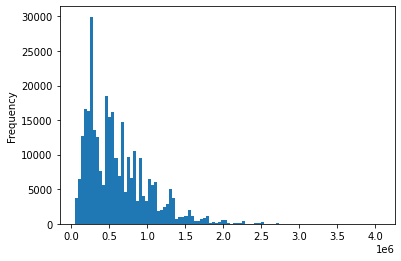

In [34]:
train["AMT_CREDIT"].plot(kind= "hist",bins=100)

In [35]:
train[["AMT_CREDIT", "NAME_INCOME_TYPE"]].groupby("NAME_INCOME_TYPE").agg(["count","sum"])

AMT_CREDIT              
                          count           sum
NAME_INCOME_TYPE                             
Businessman                  10  1.228500e+07
Commercial associate      71617  4.797717e+10
Maternity leave               5  3.748500e+06
Pensioner                 55362  3.003643e+10
State servant             21703  1.453709e+10
Student                      18  9.194175e+06
Unemployed                   22  1.681650e+07
Working                  158774  9.161435e+10

In [66]:
train["NAME_INCOME_TYPE"].value_counts(normalize=True)*100

Working                 51.631974
Commercial associate    23.289248
Pensioner               18.003258
State servant            7.057634
Unemployed               0.007154
Student                  0.005853
Businessman              0.003252
Maternity leave          0.001626
Name: NAME_INCOME_TYPE, dtype: float64

In [36]:
train[["AMT_CREDIT", "OCCUPATION_TYPE"]].groupby("OCCUPATION_TYPE").agg(["count","sum"])

AMT_CREDIT              
                           count           sum
OCCUPATION_TYPE                               
Accountants                 9813  6.964849e+09
Cleaning staff              4653  2.377501e+09
Cooking staff               5946  3.205930e+09
Core staff                 27570  1.723740e+10
Drivers                    18603  1.139125e+10
HR staff                     563  3.856456e+08
High skill tech staff      11380  7.316336e+09
IT staff                     526  3.406364e+08
Laborers                   55186  3.149012e+10
Low-skill Laborers          2093  9.595668e+08
Managers                   21371  1.656447e+10
Medicine staff              8537  5.185636e+09
Private service staff       2652  1.672522e+09
Realty agents                751  4.921120e+08
Sales staff                32102  1.808172e+10
Secretaries                 1305  7.745441e+08
Security staff              6721  3.744137e+09
Waiters/barmen staff        1348  6.624773e+08

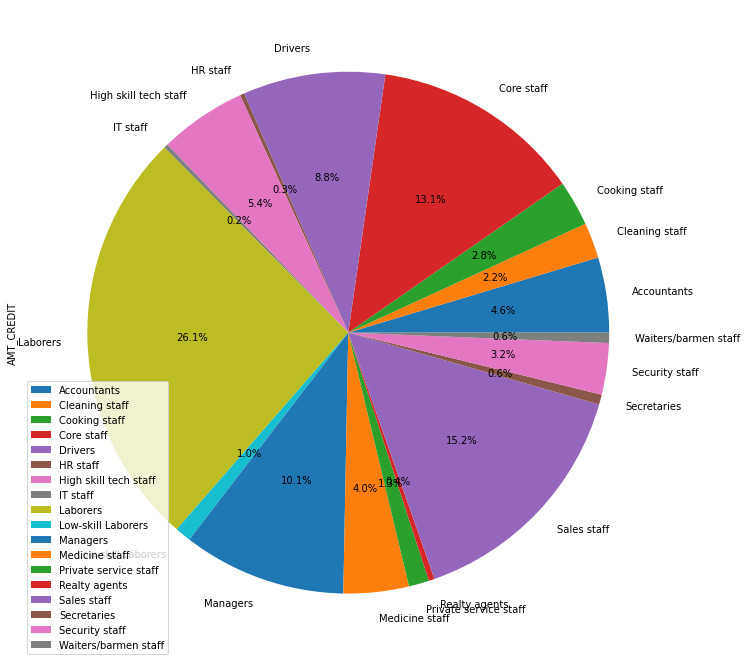

In [37]:
train[["AMT_CREDIT", "OCCUPATION_TYPE"]].groupby("OCCUPATION_TYPE").agg('count').plot(kind="pie", y="AMT_CREDIT", figsize=(18,12), autopct='%1.1f%%')

In [38]:
atp = train[["AMT_CREDIT", "OCCUPATION_TYPE"]].groupby("OCCUPATION_TYPE").agg(["count"])
tc = atp["AMT_CREDIT"]['count'].sum()
atp["percentage"]= ((atp['AMT_CREDIT']['count'])*100/tc).round(2)
atp

,AMT_CREDIT,percentage
,count,
OCCUPATION_TYPE,,
Accountants,9813,4.65
Cleaning staff,4653,2.20
Cooking staff,5946,2.82
Core staff,27570,13.06
Drivers,18603,8.81
HR staff,563,0.27
High skill tech staff,11380,5.39
IT staff,526,0.25


In [39]:
atp = train[["AMT_CREDIT", "OCCUPATION_TYPE"]].groupby("OCCUPATION_TYPE").agg(["count"])
tc = atp[["AMT_CREDIT"]].sum
tc


<bound method NDFrame._add_numeric_operations.<locals>.sum of                       AMT_CREDIT
                           count
OCCUPATION_TYPE                 
Accountants                 9813
Cleaning staff              4653
Cooking staff               5946
Core staff                 27570
Drivers                    18603
HR staff                     563
High skill tech staff      11380
IT staff                     526
Laborers                   55186
Low-skill Laborers          2093
Managers                   21371
Medicine staff              8537
Private service staff       2652
Realty agents                751
Sales staff                32102
Secretaries                 1305
Security staff              6721
Waiters/barmen staff        1348>

##  Distribution of AMT_INCOME_TOTAL

In [41]:
#code
d =  train.head(10)
pd.set_option('display.max_columns', None)
d

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

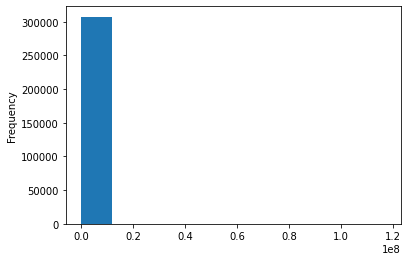

In [42]:
train["AMT_INCOME_TOTAL"].plot(kind= "hist",bins=10)

In [43]:
train[["AMT_INCOME_TOTAL", "NAME_INCOME_TYPE"]].groupby("NAME_INCOME_TYPE").agg(["count","sum"])

AMT_INCOME_TOTAL              
                                count           sum
NAME_INCOME_TYPE                                   
Businessman                        10  6.525000e+06
Commercial associate            71617  1.453505e+10
Maternity leave                     5  7.020000e+05
Pensioner                       55362  7.551448e+09
State servant                   21703  3.900853e+09
Student                            18  3.069000e+06
Unemployed                         22  2.431800e+06
Working                        158774  2.590714e+10

##  Distribution of AMT_GOODS_PRICE

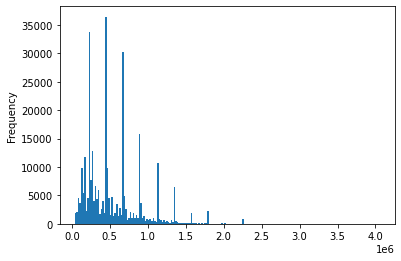

In [45]:
train["AMT_GOODS_PRICE"].plot(kind= "hist",bins=200)

##  Who accompanied client when applying for the  application

In [69]:
#code
train["NAME_TYPE_SUITE"].value_counts(normalize=True)*100


Unaccompanied      81.159562
Family             13.111205
Spouse, partner     3.713029
Children            1.066884
Other_B             0.578018
Other_A             0.282804
Group of people     0.088499
Name: NAME_TYPE_SUITE, dtype: float64

##  Data is balanced or imbalanced

In [47]:
#code

##  Types of loan

* **Rovolving loans :**  Arrangement which allows for the loan amount to be withdrawn, repaid, and redrawn again in any manner and any number of times, until the arrangement expires. Credit card loans and overdrafts are revolving loans. Also called evergreen loan

In [48]:
#code
train[["AMT_CREDIT", "NAME_CONTRACT_TYPE"]].groupby("NAME_CONTRACT_TYPE").agg(["count"])

,AMT_CREDIT
,count
NAME_CONTRACT_TYPE,
Cash loans,278232
Revolving loans,29279


In [70]:
train["NAME_CONTRACT_TYPE"].value_counts(normalize= True)*100

Cash loans         90.478715
Revolving loans     9.521285
Name: NAME_CONTRACT_TYPE, dtype: float64

* Most of the loans are Cash loans which were taken by applicants. **90.5 %** loans are Cash loans.

## Purpose of loan

In [150]:
pa["NAME_CASH_LOAN_PURPOSE"].value_counts(normalize= True)*100

XAP                                 55.242083
XNA                                 40.588691
Repairs                              1.422872
Other                                0.934491
Urgent needs                         0.503648
Buying a used car                    0.172912
Building a house or an annex         0.161237
Everyday expenses                    0.144652
Medicine                             0.130163
Payments on other loans              0.115614
Education                            0.094180
Journey                              0.074182
Purchase of electronic equipment     0.063525
Buying a new car                     0.060591
Wedding / gift / holiday             0.057597
Buying a home                        0.051790
Car repairs                          0.047718
Furniture                            0.044845
Buying a holiday home / land         0.031912
Business development                 0.025506
Gasification / water supply          0.017962
Buying a garage                   

##  Income sources of Applicant's who applied for loan

In [51]:
#code
train[["AMT_CREDIT", "NAME_INCOME_TYPE"]].groupby("NAME_INCOME_TYPE").agg(["count"])

,AMT_CREDIT
,count
NAME_INCOME_TYPE,
Businessman,10
Commercial associate,71617
Maternity leave,5
Pensioner,55362
State servant,21703
Student,18
Unemployed,22
Working,158774


In [141]:
train["NAME_INCOME_TYPE"].value_counts(normalize=True)*100

Working                 51.631974
Commercial associate    23.289248
Pensioner               18.003258
State servant            7.057634
Unemployed               0.007154
Student                  0.005853
Businessman              0.003252
Maternity leave          0.001626
Name: NAME_INCOME_TYPE, dtype: float64

* 51.6 % Applicants mentioned that they are working.  23.3 % are Commercial Associate and 18 % are Pensioner etc. 

##  Family Status of Applicant's who applied for loan

In [151]:
(train["NAME_FAMILY_STATUS"].value_counts(normalize= True)*100).round(2)

Married                 63.88
Single / not married    14.78
Civil marriage           9.68
Separated                6.43
Widow                    5.23
Unknown                  0.00
Name: NAME_FAMILY_STATUS, dtype: float64

* 63.9 % applicants are married. 14.8 % are single etc.

##   Occupation of Applicant's who applied for loan

In [153]:
(train["OCCUPATION_TYPE"].value_counts()).head(5)

Laborers       55186
Sales staff    32102
Core staff     27570
Managers       21371
Drivers        18603
Name: OCCUPATION_TYPE, dtype: int64

* **Top Applicant's who applied for loan :**
  * Laborers - Apprx. 55 K
  * Sales Staff - Approx. 32 K
  * Core staff - Approx. 28 K
  * Managers - Approx. 21 K
  * Drivers - Approx. 19 K

##   Education of Applicant's who applied for loan

In [154]:
#code
(train["NAME_EDUCATION_TYPE"].value_counts(normalize= True)*100).round(2)
#train[["AMT_CREDIT", "NAME_EDUCATION_TYPE"]].groupby("NAME_EDUCATION_TYPE").agg(["count"])


Secondary / secondary special    71.02
Higher education                 24.34
Incomplete higher                 3.34
Lower secondary                   1.24
Academic degree                   0.05
Name: NAME_EDUCATION_TYPE, dtype: float64

* 71 % applicants have secondary and 24.3 % having higher education.

##  For which types of house higher applicant's applied for loan ?

In [142]:
train["NAME_HOUSING_TYPE"].value_counts(normalize=True)*100

House / apartment      88.734387
With parents            4.825844
Municipal apartment     3.636618
Rented apartment        1.587260
Office apartment        0.851026
Co-op apartment         0.364865
Name: NAME_HOUSING_TYPE, dtype: float64

* Approx. 89 % peoples applied for loan, they mentioned type of house is **House / Appartment**.

## Types of Organizations who applied for loan 

In [156]:
#code
#train[["AMT_CREDIT", "ORGANIZATION_TYPE"]].groupby("ORGANIZATION_TYPE").agg(["count"])
(train["ORGANIZATION_TYPE"].value_counts()).head(10)


Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Name: ORGANIZATION_TYPE, dtype: int64

* **Types of Organizations who applied for loan :**
  * Business Entity Type 3 - Approx. 68 K
  * XNA - Approx. 55 K
  * Self employed - Approx. 38 K
  * Others - Approx. 17 K
  * Medicine - Approx. 11 K
 

In [160]:
#train[["AMT_CREDIT", "ORGANIZATION_TYPE"]].groupby("ORGANIZATION_TYPE").agg(["count"]).plot(kind= "pie", y="AMT_CREDIT", autopct='%1.1f%%', figsize=(12,12))

##  Exploration in terms of loan is repayed or not

##  Income sources of Applicant's in terms of loan is repayed or not in %

In [59]:
#code

In [60]:
d =  train.head(10)
pd.set_option('display.max_columns', None)
d

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [61]:
train["NAME_INCOME_TYPE"].unique()

array(['Working', 'State servant', 'Commercial associate', 'Pensioner',
       'Unemployed', 'Student', 'Businessman', 'Maternity leave'],
      dtype=object)

In [101]:
e =  pa.head(10)
pd.set_option('display.max_columns', None)
e

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN
5,1383531,199383,Cash loans,23703.930,315000.0,340573.5,NaN,315000.0,SATURDAY,8,Y,1,NaN,NaN,NaN,Everyday expenses,Approved,-684,Cash through the bank,XAP,Family,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,18.0,low_normal,Cash X-Sell: low,365243.0,-654.0,-144.0,-144.0,-137.0,1.0
6,2315218,175704,Cash loans,NaN,0.0,0.0,NaN,NaN,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Canceled,-14,XNA,XAP,NaN,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN
7,1656711,296299,Cash loans,NaN,0.0,0.0,NaN,NaN,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Canceled,-21,XNA,XAP,NaN,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN
8,2367563,342292,Cash loans,NaN,0.0,0.0,NaN,NaN,MONDAY,15,Y,1,NaN,NaN,NaN,XNA,Canceled,-386,XNA,XAP,NaN,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN
9,2579447,334349,Cash loans,NaN,0.0,0.0,NaN,NaN,SATURDAY,15,Y,1,NaN,NaN,NaN,XNA,Canceled,-57,XNA,XAP,NaN,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN


## Family Status of Applicant's in terms of loan is repayed or not in %

In [112]:
d = ip.head(10)
pd.set_option('display.max_columns', None)
d

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130,24350.130
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040,2160.585
5,1137312,164489,1.0,12,-1384.0,-1417.0,5970.375,5970.375
6,2234264,184693,4.0,11,-349.0,-352.0,29432.295,29432.295
7,1818599,111420,2.0,4,-968.0,-994.0,17862.165,17862.165
8,2723183,112102,0.0,14,-197.0,-197.0,70.740,70.740
9,1413990,109741,1.0,4,-570.0,-609.0,14308.470,14308.470


In [115]:
ip1= ip[ip["AMT_PAYMENT"].isnull()]

In [127]:
#code
reorno = pd.merge(ip1, train, 
                   on='SK_ID_CURR', 
                   how='left')

In [121]:
reorno.head()

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,1531600,103793,1.0,7,-668.0,NaN,49741.020,NaN,1.0,Cash loans,F,Y,Y,0.0,81000.0,526491.0,17397.0,454500.0,"Spouse, partner",Pensioner,Secondary / secondary special,Married,House / apartment,0.028663,-20817.0,365243.0,-3487.0,-4247.0,21.0,1.0,0.0,0.0,1.0,1.0,0.0,NaN,2.0,2.0,2.0,SATURDAY,8.0,0.0,0.0,0.0,1.0,0.0,0.0,XNA,NaN,0.223593,0.457900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-1355.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
1,1947105,159974,1.0,24,-36.0,NaN,22849.515,NaN,1.0,Cash loans,F,N,Y,0.0,90000.0,675000.0,38659.5,675000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.006671,-15906.0,-1618.0,-1843.0,-5004.0,NaN,1.0,1.0,0.0,1.0,0.0,0.0,Laborers,2.0,2.0,2.0,WEDNESDAY,13.0,0.0,0.0,0.0,0.0,0.0,0.0,Agriculture,0.598356,0.670706,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-1041.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2,1843773,167270,1.0,22,-20.0,NaN,48092.355,NaN,1.0,Cash loans,F,N,Y,0.0,202500.0,1377000.0,39226.5,1377000.0,Unaccompanied,Pensioner,Secondary / secondary special,Married,House / apartment,0.019689,-19131.0,365243.0,-8914.0,-2204.0,NaN,1.0,0.0,0.0,1.0,0.0,0.0,NaN,2.0,2.0,2.0,MONDAY,10.0,0.0,0.0,0.0,0.0,0.0,0.0,XNA,NaN,0.278615,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [128]:
reorno.shape

(2905, 129)

In [122]:

reorno["NAME_FAMILY_STATUS"].value_counts(normalize=True)*100

Married                 67.053813
Single / not married    11.265970
Civil marriage           9.407666
Separated                6.233062
Widow                    6.039489
Name: NAME_FAMILY_STATUS, dtype: float64

##  Occupation of Applicant's in terms of loan is repayed or not in %

In [129]:
#code
reorno["OCCUPATION_TYPE"].value_counts(normalize=True)*100

Laborers                 32.558140
Core staff               14.192010
Sales staff              11.508646
Managers                  9.898629
Drivers                   6.559332
High skill tech staff     6.320811
Medicine staff            5.843769
Cooking staff             3.100775
Accountants               2.981515
Security staff            2.623733
Cleaning staff            1.848539
Waiters/barmen staff      0.834824
Private service staff     0.536673
Secretaries               0.357782
Realty agents             0.357782
HR staff                  0.238521
Low-skill Laborers        0.178891
IT staff                  0.059630
Name: OCCUPATION_TYPE, dtype: float64

##  Education of Applicant's in terms of loan is repayed or not in %

In [130]:
#code
reorno["NAME_EDUCATION_TYPE"].value_counts(normalize=True)*100

Secondary / secondary special    76.616338
Higher education                 19.357336
Incomplete higher                 2.903600
Lower secondary                   1.122726
Name: NAME_EDUCATION_TYPE, dtype: float64

##  For which types of house higher applicant's applied for loan in terms of loan is repayed or not in %

In [131]:
#code
reorno["HOUSETYPE_MODE"].value_counts(normalize=True)*100

block of flats      98.326693
specific housing     1.593625
terraced house       0.079681
Name: HOUSETYPE_MODE, dtype: float64

##  Types of Organizations in terms of loan is repayed or not in %

In [132]:
#code
reorno["ORGANIZATION_TYPE"].value_counts(normalize=True)*100

XNA                       24.854820
Business Entity Type 3    16.569880
Self-employed              9.794812
Business Entity Type 2     7.239644
Other                      5.265196
School                     4.916763
Government                 3.987611
Medicine                   3.948897
Housing                    2.555168
Kindergarten               2.206736
Industry: type 3           1.897019
Construction               1.780875
Transport: type 4          1.509872
Trade: type 7              1.471158
Transport: type 2          1.084011
Trade: type 3              1.006581
Industry: type 9           0.890437
Industry: type 11          0.851723
Business Entity Type 1     0.658149
Postal                     0.542005
Transport: type 3          0.503291
Agriculture                0.503291
Military                   0.503291
Restaurant                 0.464576
Electricity                0.425861
Security Ministries        0.348432
Industry: type 7           0.348432
University                 0

## Distribution of Name of type of the Suite in terms of loan is repayed or not in %

In [136]:
#code
dis= reorno[["SK_ID_CURR", "NAME_TYPE_SUITE"]].groupby("NAME_TYPE_SUITE").agg(["count"])
dis

,SK_ID_CURR
,count
NAME_TYPE_SUITE,
Children,21
Family,259
Group of people,7
Other_A,10
Other_B,10
"Spouse, partner",94
Unaccompanied,2181


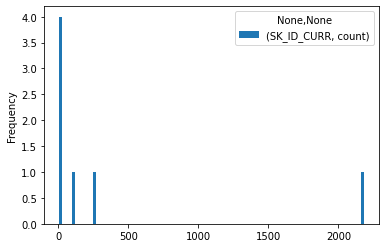

In [140]:
reorno[["SK_ID_CURR", "NAME_TYPE_SUITE"]].groupby("NAME_TYPE_SUITE").agg(["count"]).plot(kind= "hist",bins=100)

#  Exploartion of previous application data

## Contract product type of previous application

In [158]:
#pa[["SK_ID_CURR", "NAME_CONTRACT_TYPE"]].groupby("NAME_CONTRACT_TYPE").agg(["count"])
(pa["NAME_CONTRACT_TYPE"].value_counts(normalize= True)*100).round(2)

Cash loans         44.76
Consumer loans     43.66
Revolving loans    11.57
XNA                 0.02
Name: NAME_CONTRACT_TYPE, dtype: float64

* **Contract product type of previous application :**
  * Cash loans - 44.8 %
  * Consumer loans - 43.7 %
  * Rovolving loan - 11.6 %
  * XNA - 0.0207 %

##  On which day highest number of clients applied in prevoies application

In [74]:
#code

In [161]:

pa[["SK_ID_CURR", "WEEKDAY_APPR_PROCESS_START"]].groupby("WEEKDAY_APPR_PROCESS_START").agg(["count"])

,SK_ID_CURR
,count
WEEKDAY_APPR_PROCESS_START,
FRIDAY,252048
MONDAY,253557
SATURDAY,240631
SUNDAY,164751
THURSDAY,249099
TUESDAY,255118
WEDNESDAY,255010


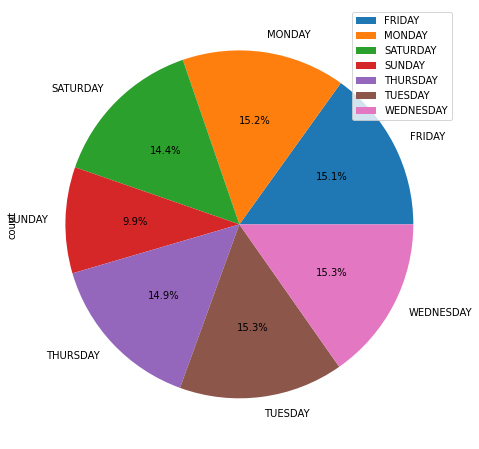

In [164]:
pa[["SK_ID_CURR", "WEEKDAY_APPR_PROCESS_START"]].groupby("WEEKDAY_APPR_PROCESS_START").agg(["count"]).plot(kind="pie", y="SK_ID_CURR", figsize=(8,8), autopct='%1.1f%%')

* What a coincedence, Approximately 15 % clients applied in each 5 days a week i.e, Tuesday, Wednesday, Monday, Friday and Thrusday. 

##  Purpose of cash loan in previous application

In [168]:
#code
#pa[["SK_ID_CURR", "NAME_CASH_LOAN_PURPOSE"]].groupby("NAME_CASH_LOAN_PURPOSE").agg(["count"])
((pa["NAME_CASH_LOAN_PURPOSE"].value_counts(normalize= True)*100).round(2)).head(5)

XAP             55.24
XNA             40.59
Repairs          1.42
Other            0.93
Urgent needs     0.50
Name: NAME_CASH_LOAN_PURPOSE, dtype: float64

* **Main purpose of the cash loan was  :**
  * XAP - 55 %
  * XNA - 41 %

##  Contract was approved or not in previous application

In [169]:
#code
#pa[["SK_ID_CURR", "NAME_CONTRACT_STATUS"]].groupby("NAME_CONTRACT_STATUS").agg(["count"])

In [93]:
(pa["NAME_CONTRACT_STATUS"].value_counts(normalize= True)*100).round(2)


Approved        62.07
Canceled        18.94
Refused         17.40
Unused offer     1.58
Name: NAME_CONTRACT_STATUS, dtype: float64

* **Contract was approved or not in previous application :**
  * Approved : 62.1 % times
  * Cancelled : 18.9 % times
  * Refused : 17.4 % times 
  * Unused offer : 1.58 % times

##  Payment method that client choose to pay for the previous application

In [170]:
#code
#pa[["SK_ID_CURR", "NAME_CONTRACT_STATUS"]].groupby("NAME_CONTRACT_STATUS").agg(["count"])

In [97]:
(pa["NAME_PAYMENT_TYPE"].value_counts(normalize= True)*100).round(2)

Cash through the bank                        61.88
XNA                                          37.56
Non-cash from your account                    0.49
Cashless from the account of the employer     0.06
Name: NAME_PAYMENT_TYPE, dtype: float64

* As we can most of the payment(61.9 %) has done thorugh cash only. 

##  Why was the previous application rejected ?

In [100]:
#code
pa["CODE_REJECT_REASON"].value_counts(normalize= True)*100

XAP       81.013152
HC        10.491530
LIMIT      3.333705
SCO        2.243245
CLIENT     1.582791
SCOFR      0.767027
XNA        0.313972
VERIF      0.211650
SYSTEM     0.042929
Name: CODE_REJECT_REASON, dtype: float64

##  Who accompanied client when applying for the previous application

In [102]:
#code
pa["NAME_TYPE_SUITE"].value_counts(normalize= True)*100


Unaccompanied      59.892282
Family             25.095404
Spouse, partner     7.892244
Children            3.714482
Other_B             2.073878
Other_A             1.068122
Group of people     0.263589
Name: NAME_TYPE_SUITE, dtype: float64

* **Who accompanied client when applying for the previous application :**
  * Unaccompanied : Approx. 60 % times
  * Family : Approx. 25 % times
  * Spouse, Partner : Approx. 8 %
  * Childrens : Approx. 4 %

##  Was the client old or new client when applying for the previous application

In [103]:
#code
pa["NAME_CLIENT_TYPE"].value_counts(normalize= True)*100


Repeater     73.718757
New          18.043376
Refreshed     8.121654
XNA           0.116213
Name: NAME_CLIENT_TYPE, dtype: float64

* Approximately 74 % was repeater clients who applied for previous application.

##  What kind of goods did the client apply for in the previous application

In [104]:
#code
pa["NAME_GOODS_CATEGORY"].value_counts(normalize= True)*100


XNA                         56.927376
Mobile                      13.453845
Consumer Electronics         7.279067
Computers                    6.332662
Audio/Video                  5.953788
Furniture                    3.212522
Photo / Cinema Equipment     1.498072
Construction Materials       1.496515
Clothing and Accessories     1.410238
Auto Accessories             0.441919
Jewelry                      0.376598
Homewares                    0.300740
Medical Supplies             0.230090
Vehicles                     0.201771
Sport and Leisure            0.178480
Gardening                    0.159740
Other                        0.152915
Office Appliances            0.139683
Tourism                      0.099329
Medicine                     0.092802
Direct Sales                 0.026703
Fitness                      0.012513
Additional Service           0.007664
Education                    0.006406
Weapon                       0.004610
Insurance                    0.003832
Animals     

##  Was the previous application for CASH, POS, CAR, …

In [105]:
#code
pa["NAME_PORTFOLIO"].value_counts(normalize= True)*100


POS      41.372603
Cash     27.634962
XNA      22.286366
Cards     8.680624
Cars      0.025446
Name: NAME_PORTFOLIO, dtype: float64

##  Was the previous application x-sell or walk-in ?

In [106]:
#code
pa["NAME_PRODUCT_TYPE"].value_counts(normalize= True)*100


XNA        63.684414
x-sell     27.319074
walk-in     8.996512
Name: NAME_PRODUCT_TYPE, dtype: float64

##  Top channels  through which they acquired the client on the previous application

In [107]:
#code
pa["CHANNEL_TYPE"].value_counts(normalize= True)*100


Credit and cash offices       43.106332
Country-wide                  29.618360
Stone                         12.697954
Regional / Local               6.497850
Contact center                 4.268734
AP+ (Cash loan)                3.415490
Channel of corporate sales     0.368216
Car dealer                     0.027062
Name: CHANNEL_TYPE, dtype: float64

* **Top channels  through which they acquired the client on the previous application :**
  * Credidit and cash offices : 43 % times
  * Country_wide : 30 % times
  * Stone : 13 % times

##  Top industry of the seller

In [108]:
#code
pa["NAME_SELLER_INDUSTRY"].value_counts(normalize= True)*100


XNA                     51.234153
Consumer electronics    23.845148
Connectivity            16.526565
Furniture                3.463568
Construction             1.783065
Clothing                 1.433888
Industry                 1.149194
Auto technology          0.298764
Jewelry                  0.162195
MLM partners             0.072745
Tourism                  0.030715
Name: NAME_SELLER_INDUSTRY, dtype: float64

##  Grouped interest rate into small medium and high of the previous application

In [109]:
#code
pa["NAME_YIELD_GROUP"].value_counts(normalize= True)*100


XNA           30.966990
middle        23.082791
high          21.154834
low_normal    19.284655
low_action     5.510731
Name: NAME_YIELD_GROUP, dtype: float64

##  Top Detailed product combination of the previous application

In [110]:
#code
pa["PRODUCT_COMBINATION"].value_counts(normalize= True)*100


Cash                              17.126503
POS household with interest       15.786996
POS mobile with interest          13.214817
Cash X-Sell: middle                8.616430
Cash X-Sell: low                   7.799898
Card Street                        6.741970
POS industry with interest         5.918612
POS household without interest     4.964943
Card X-Sell                        4.825651
Cash Street: high                  3.571480
Cash X-Sell: high                  3.551239
Cash Street: middle                2.075493
Cash Street: low                   2.026148
POS mobile without interest        1.442150
POS other with interest            1.429993
POS industry without interest      0.754670
POS others without interest        0.153006
Name: PRODUCT_COMBINATION, dtype: float64

##  Did the client requested insurance during the previous application

In [111]:
#code
pa["NFLAG_INSURED_ON_APPROVAL"].value_counts(normalize= True)*100


0.0    66.742984
1.0    33.257016
Name: NFLAG_INSURED_ON_APPROVAL, dtype: float64

# 6. Conclusion:

## Informatoin
Size of Application_train data  (307511, 122)

Size of POS_CASH_balance data  (10001358, 8)

Size of bureau_balance data  (27299925, 3)

Size of previous_application data  (1670214, 37)

Size of installments_payments data  (13605401, 8)

Size of credit_card_balance data  (3840312, 23)

Size of bureau data  (1716428, 17)

## Useful Table Brief View

In [171]:
train.head(20)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.000,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.0220,0.0198,0.0000,0.000,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.0000,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.000,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.0790,0.0554,0.0000,0.000,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.0100,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.000,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [145]:
pa.head(20)

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.000000,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN
5,1383531,199383,Cash loans,23703.930,315000.0,340573.5,NaN,315000.0,SATURDAY,8,Y,1,NaN,NaN,NaN,Everyday expenses,Approved,-684,Cash through the bank,XAP,Family,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,18.0,low_normal,Cash X-Sell: low,365243.0,-654.0,-144.0,-144.0,-137.0,1.0
6,2315218,175704,Cash loans,NaN,0.0,0.0,NaN,NaN,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Canceled,-14,XNA,XAP,NaN,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN
7,1656711,296299,Cash loans,NaN,0.0,0.0,NaN,NaN,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Canceled,-21,XNA,XAP,NaN,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN
8,2367563,342292,Cash loans,NaN,0.0,0.0,NaN,NaN,MONDAY,15,Y,1,NaN,NaN,NaN,XNA,Canceled,-386,XNA,XAP,NaN,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN
9,2579447,334349,Cash loans,NaN,0.0,0.0,NaN,NaN,SATURDAY,15,Y,1,NaN,NaN,NaN,XNA,Canceled,-57,XNA,XAP,NaN,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN


In [146]:
ip.head(20)

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130,24350.130
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040,2160.585
5,1137312,164489,1.0,12,-1384.0,-1417.0,5970.375,5970.375
6,2234264,184693,4.0,11,-349.0,-352.0,29432.295,29432.295
7,1818599,111420,2.0,4,-968.0,-994.0,17862.165,17862.165
8,2723183,112102,0.0,14,-197.0,-197.0,70.740,70.740
9,1413990,109741,1.0,4,-570.0,-609.0,14308.470,14308.470


## Distribution of Income Data of Client

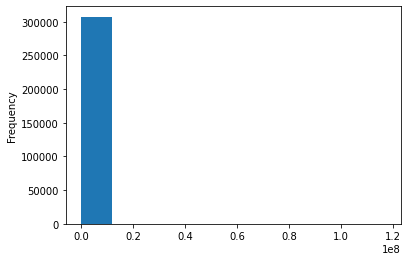

In [147]:
train["AMT_INCOME_TOTAL"].plot(kind= "hist",bins=10)

## Distribution of Goods Price

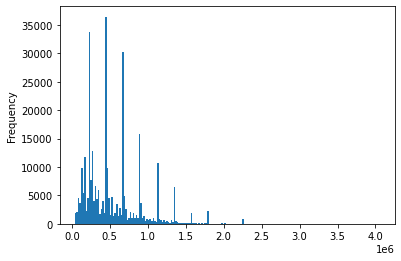

In [148]:
train["AMT_GOODS_PRICE"].plot(kind= "hist",bins=200)

## Key Points of Credit Card Analysis

## 1. Accompany with Client
Unaccompanied      81.159562

Family             13.111205

Spouse, partner     3.713029

Children            1.066884

Other_B             0.578018

Other_A             0.282804

Group of people     0.088499

## 2. Purpose of Loan in Percentage
XAP                                 55.24208

XNA                                 40.588691

Repairs                              1.422872

Other                                0.934491

Urgent needs                         0.503648

Buying a used car                    0.172912

Building a house or an annex         0.161237

Everyday expenses                    0.144652

Medicine                             0.130163

Payments on other loans              0.115614

Education                            0.094180

Journey                              0.074182

Purchase of electronic equipment     0.063525

Buying a new car                     0.060591

## 3. 51.6 % Applicants mentioned that they are working. 23.3 % are Commercial Associate and 18 % are Pensioner etc.

## 4. Faimly Status who Applied For Loan
Married                 63.88

Single / not married    14.78

Civil marriage           9.68

Separated                6.43

Widow                    5.23


##5. Occupation of Applicant's who applied for loan
### Top Applicant's who applied for loan :
Laborers - Apprx. 55 K


Sales Staff - Approx. 32 K

Core staff - Approx. 28 K

Managers - Approx. 21 K





## 6. 71 % applicants have secondary and 24.3 % having higher education.

## 7. 	Approx. 89 % peoples applied for loan, they mentioned type of house is House / Appartment.

## 8. Types of Organizations who applied for loan :
Business Entity Type 3 - Approx. 68 K

XNA - Approx. 55 K

Self employed - Approx. 38 K

Others - Approx. 17 K

Medicine - Approx. 11 K


## 9. Occupation of Applicant's in terms of loan is not repayed in %
Sales staff              11.508646

Managers                  9.898629

Drivers                   6.559332

High skill tech staff     6.320811

Medicine staff            5.843769

Cooking staff             3.100775

Accountants               2.981515

Security staff            2.623733


## 10. Contract product type of previous application :
Cash loans - 44.8 %

Consumer loans - 43.7 %

Rovolving loan - 11.6 %

XNA - 0.0207 %


## 11. It is a coincedence, Approximately 15 % clients applied in each 5 days a week i.e, Tuesday, Wednesday, Monday, Friday and Thrusday.

## 12. Main purpose of the cash loan was :
XAP - 55 %

XNA - 41 %


## 13. Contract was approved or not in previous application :
Approved : 62.1 % times

Cancelled : 18.9 % times

Refused : 17.4 % times

Unused offer : 1.58 % times


## 14. Who accompanied client when applying for the previous application :
Unaccompanied : Approx. 60 % times

Family : Approx. 25 % times

Spouse, Partner : Approx. 8 %

Childrens : Approx. 4 %


## 15. Approximately 74 % was repeater clients who applied for previous application.

## 16. Top channels through which they acquired the client on the previous application :
Credidit and cash offices : 43 % times

Country_wide : 30 % times

Stone : 13 % times


## 17. Top Industry of the Seller
XNA                     51.234153

Consumer electronics    23.845148

Connectivity            16.526565

Furniture                3.463568

Construction             1.783065

Clothing                 1.433888

Industry                 1.149194


## 18. Top 5 Detailed Product
Cash                              17.126503

POS household with interest       15.786996

POS mobile with interest          13.214817

Cash X-Sell: middle                8.616430

Cash X-Sell: low                   7.799898

Card Street                        6.741970


## 19. Almost the payment(61.9 %) has done thorugh cash only.

## 20. Request for Insurence by client
Yes-    66.74%

No-    33.25%
